In [1]:
from coders import FeaturePSK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[22200] Lock acquired: 2


In [2]:
def coder_fitness(cutoff=0.95, size=3000):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 1829/1416/579
Gen average time: 0:00:19.330709
Gen 2 grades: 1768/1710/1254
Gen average time: 0:00:18.838961
Gen 3 grades: 1963/1790/1471
Gen average time: 0:00:18.812611
Gen 4 grades: 2030/1959/1672
Gen average time: 0:00:18.578414
Gen 5 grades: 1963/1941/1547
Gen average time: 0:00:18.086874
Gen 6 grades: 2051/2025/1766
Gen average time: 0:00:17.416066
Gen 7 grades: 2273/2050/1410
Gen average time: 0:00:16.276554
Gen 8 grades: 2716/2257/1837
Gen average time: 0:00:15.319769
Gen 9 grades: 2675/2451/1959
Gen average time: 0:00:14.329904
Gen 10 grades: 2473/2431/2005
Gen average time: 0:00:14.111521
Gen 11 grades: 2746/2648/2393
Gen average time: 0:00:14.033032
Gen 12 grades: 2777/2689/2197
Gen average time: 0:00:14.101456
Gen 13 grades: 2746/2700/2326
Gen average time: 0:00:13.977648
Gen 14 grades: 2892/2800/2442
Gen average time: 0:00:14.099801
Gen 15 grades: 3043/2884/2480
Gen average time: 0:00:13.346441
Gen 16 grades: 3148/2865/2291
Gen average time: 0:00:12.970795
Ge

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/FeaturePSK_GA_1949788676336.pdf


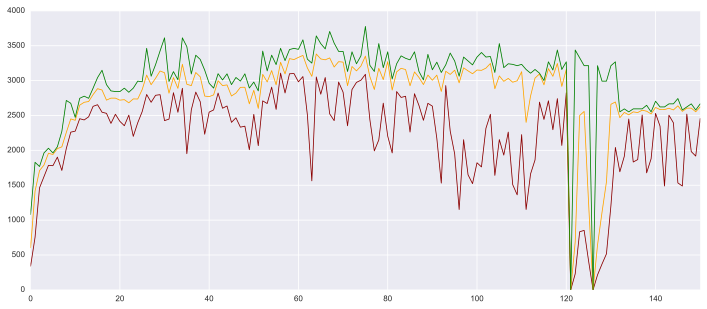

In [14]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [15]:
for c in population._sort(10000):
    print(c)

FeaturePSK:
    sqe_start_v: 0.5410983493273152
    rate: 96000
    sqe_end: 0.09549392762099743
    sqe_start: 0.03414274808733525
    filter_window_scale: 0.24781030705133414
    peak_width_start: 0.29384941498225414
    symbol_duration: 0.0007464805371431829
    amplitude: 0.6826848292426947
    sqe_end_v: 0.5513244870844328
    filter_window_base: 5
    filter_type: 2
    peak_width_span: 0.3654207701483683
    frequency: 2056
    filter_std_base: 18
    filter_shape: 0.2574643157032489
    filter_std_scale: 0.24270131332179112
    symbol_width: 2
    peak_threshold: 0.2499613290689157
FeaturePSK:
    sqe_start_v: 0.5410983493273152
    rate: 96000
    sqe_end: 0.09953206442423751
    sqe_start: 0.03414274808733525
    filter_window_scale: 0.04974751463903391
    peak_width_start: 0.29384941498225414
    symbol_duration: 0.0007464805371431829
    amplitude: 0.6535167591522242
    sqe_end_v: 0.5513244870844328
    filter_window_base: 5
    filter_type: 2
    peak_width_span: 0.50908